In [ ]:
# Package import
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers, Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",module="tensorflow")
from sklearn.metrics import classification_report
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.
Classes list :  ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Classes:  {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
x_train shape: (1435, 256, 256, 3)
y_train shape: (1435, 4)
x_test shape: (1435, 256, 256, 3)
y_test shape: (1435, 4)


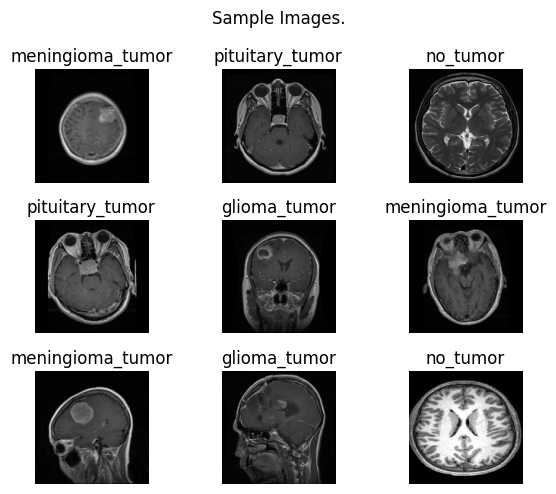

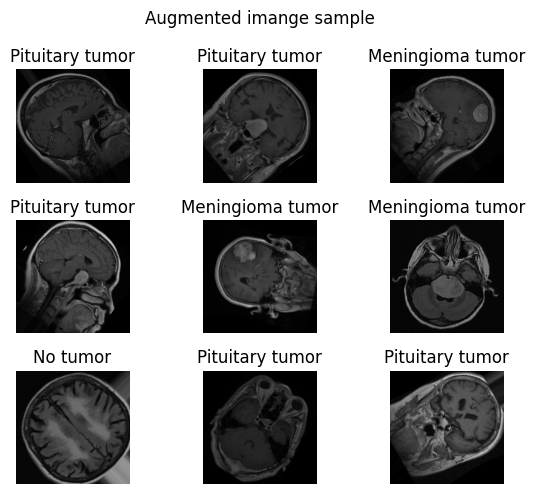

In [ ]:
# pre_proccesing file as Custom module
from drive.MyDrive.ColabNotebooks.Final_Copy import pre_Proccesing
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import trainingModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import evaluatePerfomanceOfModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPerformance
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPrediction


In [ ]:
# Splited Dataset into x_train, y_train, x_test, y_test
x_trian = pre_Proccesing.x_train
y_train = pre_Proccesing.y_train
x_test  = pre_Proccesing.x_test
y_test  = pre_Proccesing.y_test

In [ ]:
pre_trained_VGG_model = tf.keras.applications.VGG16(input_shape=(256, 256, 3), include_top=False, weights="imagenet", pooling='max')
output_Layer = pre_trained_VGG_model.output
output = Dense(4, activation='softmax')(output_Layer)
model_VGG16 = Model(inputs = pre_trained_VGG_model.input, outputs = output)
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# Declaration of optimizer, loss_function and metrics_acc
optimizer     = optimizers.Adam(learning_rate=0.0001)
loss_function = 'categorical_crossentropy'
metrics_acc   = ['accuracy']
epochs = 10

# Compiling and training CNN model
history_VGG = trainingModel(model_VGG16,optimizer,loss_function, metrics_acc,x_trian,y_train,x_test,y_test, epochs)

Epoch 1/10
45/45 [==============================] - 80s 1s/step - loss: 1.1779 - accuracy: 0.4801 - val_loss: 1.2928 - val_accuracy: 0.4265
Epoch 2/10
45/45 [==============================] - 33s 746ms/step - loss: 0.6289 - accuracy: 0.7617 - val_loss: 0.6456 - val_accuracy: 0.7456
Epoch 3/10
45/45 [==============================] - 34s 755ms/step - loss: 0.3581 - accuracy: 0.8725 - val_loss: 0.4094 - val_accuracy: 0.8585
Epoch 4/10
45/45 [==============================] - 34s 751ms/step - loss: 0.2268 - accuracy: 0.9213 - val_loss: 0.3822 - val_accuracy: 0.8704
Epoch 5/10
45/45 [==============================] - 31s 686ms/step - loss: 0.2057 - accuracy: 0.9226 - val_loss: 0.3044 - val_accuracy: 0.8843
Epoch 6/10
45/45 [==============================] - 34s 754ms/step - loss: 0.0916 - accuracy: 0.9763 - val_loss: 0.3199 - val_accuracy: 0.8885
Epoch 7/10
45/45 [==============================] - 34s 752ms/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.5745 - val_accuracy: 0.8564
Ep

CNN model Test Loss:  0.5227614641189575
CNN model Test Accuracy 0.8592334389686584


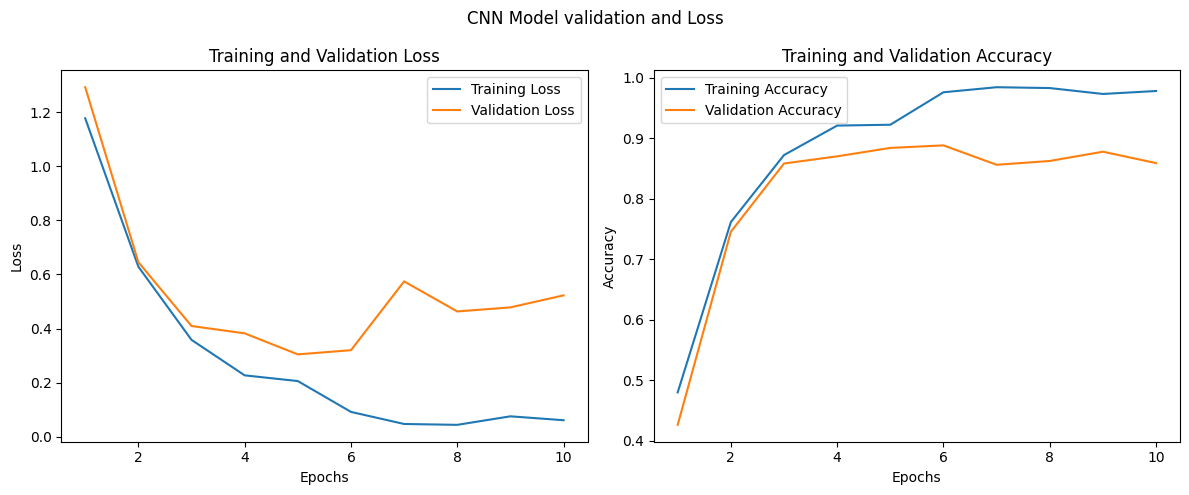

In [ ]:
# evaluating result from a CNN model Test Loss and Accuracy of Model
evaluatePerfomanceOfModel(model_VGG16, x_test, y_test, epochs, history_VGG)

45/45 [==============================] - 7s 158ms/step


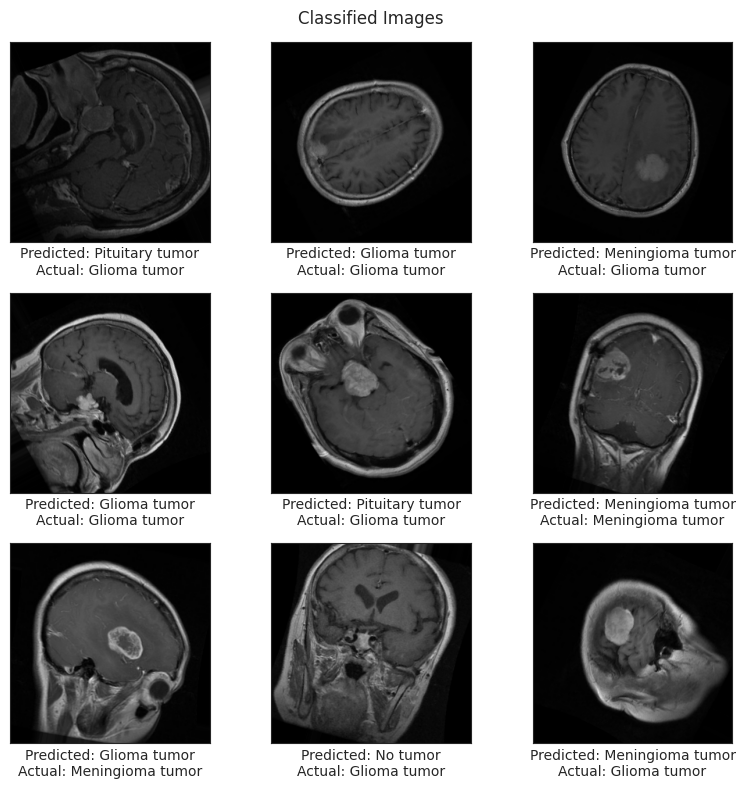

In [ ]:
# Prediction using CNN model
modelPrediction(model_VGG16,x_test, y_test)

45/45 [==============================] - 7s 161ms/step
                  precision    recall  f1-score   support

    Glioma tumor       0.81      0.98      0.89       415
Meningioma tumor       0.95      0.68      0.80       419
        No tumor       0.72      0.96      0.82       201
 Pituitary tumor       0.94      0.87      0.91       400

        accuracy                           0.86      1435
       macro avg       0.86      0.87      0.85      1435
    weighted avg       0.88      0.86      0.86      1435



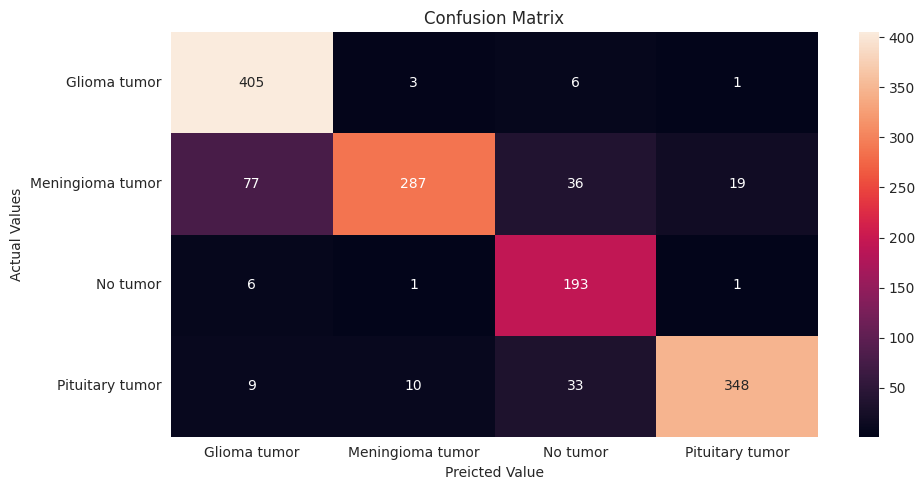

In [ ]:
# Permomance of the model and confusion metrix
modelPerformance(model_VGG16, x_test, y_test)